**This Notebook done by:**
- Salma Talat Shaheen `220210654`
***
###**`Conflict Resolution in a Media Advisor Expert System`**
**Conflict resolution in an expert system** refers to the process of managing situations where multiple rules are triggered at the same time, each suggesting different actions or outcomes. The system must determine which action to prioritize by evaluating the rules based on predefined criteria, such as priority levels, relevance, or specific conditions, ensuring that the most appropriate decision is made.

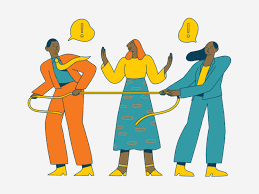

In [13]:
pip install experta

In [2]:
!sed -i 's/collections.Mapping/collections.abc.Mapping/' /usr/local/lib/python3.10/dist-packages/frozendict/__init__.py

###**`Defining Facts for a Media Advisor Expert System`**

This section defines key **facts** such as **environment, job type, feedback needs**, and **medium** to facilitate rule-based decision-making for trainees.

In [4]:
from experta import *

# Define Facts
class Environment(Fact):
    """Represents the environment a trainee interacts with."""
    pass

class Job(Fact):
    """Represents the job type for the trainee."""
    pass

class Feedback(Fact):
    """Indicates whether feedback is required."""
    pass

class Medium(Fact):
    """Represents the medium selected based on rules."""
    pass

###**`Defining the rules (Rule 5 ,Rule 8 ,Rule 13 and Rule 14)`**

In [5]:
# Media Advisor Knowledge Engine
class MediaAdvisor(KnowledgeEngine):
    @Rule(Fact(stimulus_situation='verbal'),
          Fact(stimulus_response='analytical'),
          Feedback(feedback='required'))
    def rule_13(self):
        self.declare(
            Medium(
                medium='lecture - tutorial',
                priority=1,  # Highest priority
                rule_fired='rule_13',
                stimulus_situation='verbal',
                stimulus_response='analytical',
                feedback='required'
            )
        )

    @Rule(Fact(stimulus_situation='verbal'),
          Fact(stimulus_response='oral'),
          Feedback(feedback='required'))
    def rule_14(self):
        self.declare(
            Medium(
                medium='role-play exercises',
                priority=2,  # Lower priority
                rule_fired='rule_14',
                stimulus_situation='verbal',
                stimulus_response='oral',
                feedback='required'
            )
        )

    # Rule 8: Analytical Jobs
    @Rule(Job(job='evaluating') |
          Job(job='reasoning') |
          Job(job='investigating'))
    def analytical_response(self):
        print("Rule 8 triggered: Stimulus response determined as 'analytical'.")
        self.declare(Fact(stimulus_response='analytical'))

    # Rule 5: Oral Jobs
    @Rule(Job(job='lecturing') |
          Job(job='advising') |
          Job(job='counselling'))
    def oral_response(self):
        print("Rule 5 triggered: Stimulus response determined as 'oral'.")
        self.declare(Fact(stimulus_response='oral'))


###**Noticed the `conflict` in Rules !**
In **Rule 13** and **Rule 14**, we observe that two trainees may share the same **stimulus_situation** and **feedback** is required.

In this case, a `conflict may arise`. To resolve this conflict, priority is used. The trainee with **stimulus_response = analytical** is given the higher priority, and Rule 13 is executed **first** based on the priority I detect in rule.
***

###**`Conflict Resolution in Media advisor system`**
The **ConflictResolver class** is designed to manage conflicts in a media advisor system by `prioritizing recommendations`. It collects relevant facts, sorts them by priority, and `resolves conflicts by selecting the highest-priority rule`. This ensures that the best-suited medium is recommended based on the priority of the rules and the situation.

In [15]:
# Conflict Resolver
class ConflictResolver:
    def __init__(self, facts):
        self.facts = facts

    def collect_mediums(self):
        # Collect all Medium facts from the knowledge engine
        return [fact for fact in self.facts.values() if isinstance(fact, Medium)]

    def resolve(self, mediums):
        print("\nResolving the conflict by the priority:")
        print("The rule with the highest priority should be fired first.\n")

        # Sort the mediums by priority (ascending order, so the highest priority is first)
        sorted_mediums = sorted(mediums, key=lambda m: m['priority'])

        # Show all conflicting recommendations in order of priority
        for medium in sorted_mediums:
            print(f"**Priority {medium['priority']}:**")
            print(f"- Rule Triggered: stimulus_situation is '{medium['stimulus_situation']}'")
            print(f"- Rule Triggered: stimulus_response is '{medium['stimulus_response']}'")
            print(f"- Rule Triggered: feedback is '{medium['feedback']}'")
            print(f"- Recommendation Medium based on its priority is: '{medium['medium']}'")
            print()

        # Final resolution: the highest priority (lowest priority number) is chosen
        chosen_medium = sorted_mediums[0]
        print(f"Final Recommendation: The medium with the highest priority is: '{chosen_medium['medium']}'")

###**`Testing Conflict Resolution in Media Advisor System based on stimulus_response  priority `**

In [9]:
# Testing the logic

advisor = MediaAdvisor()

# Test Case: Conflict Example
advisor.reset()
advisor.declare(Fact(stimulus_situation='verbal'))
advisor.declare(Fact(stimulus_response='analytical'))
advisor.declare(Fact(stimulus_response='oral'))
advisor.declare(Feedback(feedback='required'))
advisor.run()

# Resolve conflict using ConflictResolver
resolver = ConflictResolver(advisor.facts)
mediums = resolver.collect_mediums()
resolver.resolve(mediums)


Resolving the conflict by the priority:
The rule with the highest priority should be fired first.

**Priority 1:**
- Rule Triggered: stimulus_situation is 'verbal'
- Rule Triggered: stimulus_response is 'analytical'
- Rule Triggered: feedback is 'required'
- Recommendation Medium based on its priority is: 'lecture - tutorial'

**Priority 2:**
- Rule Triggered: stimulus_situation is 'verbal'
- Rule Triggered: stimulus_response is 'oral'
- Rule Triggered: feedback is 'required'
- Recommendation Medium based on its priority is: 'role-play exercises'

Final Recommendation: The medium with the highest priority is: 'lecture - tutorial'


###**`Job-Based Rule Triggering and Conflict Resolution`**

The code **identifies job roles** such as evaluating or lecturing to determine responses as **analytical** or **oral**, based on `Rule 5` and `Rule 8`.

It then resolves conflicts between Rule 13 and Rule 14 by prioritizing the rule with the highest importance, ensuring precise medium selection.

In [10]:
# Testing the logic with job detection
advisor = MediaAdvisor()

# Test Case: Conflict Example with Job Detection
print("Test Case: Job Detection for Analytical and Oral Responses")

advisor.reset()

# Declare jobs
advisor.declare(Job(job='evaluating'))  # Should trigger Rule 8 (Analytical)
advisor.declare(Job(job='lecturing'))  # Should trigger Rule 5 (Oral)

# Feedback is required for both cases
advisor.declare(Fact(stimulus_situation='verbal'))  # Common stimulus situation
advisor.declare(Feedback(feedback='required'))

advisor.run()

# Resolve conflict using ConflictResolver
resolver = ConflictResolver(advisor.facts)
mediums = resolver.collect_mediums()
resolver.resolve(mediums)

Test Case: Job Detection for Analytical and Oral Responses
Rule 5 triggered: Stimulus response determined as 'oral'.
Rule 8 triggered: Stimulus response determined as 'analytical'.

Resolving the conflict by the priority:
The rule with the highest priority should be fired first.

**Priority 1:**
- Rule Triggered: stimulus_situation is 'verbal'
- Rule Triggered: stimulus_response is 'analytical'
- Rule Triggered: feedback is 'required'
- Recommendation Medium based on its priority is: 'lecture - tutorial'

**Priority 2:**
- Rule Triggered: stimulus_situation is 'verbal'
- Rule Triggered: stimulus_response is 'oral'
- Rule Triggered: feedback is 'required'
- Recommendation Medium based on its priority is: 'role-play exercises'

Final Recommendation: The medium with the highest priority is: 'lecture - tutorial'


###**`Another test cases with different jobs`**

In [11]:
# Testing another test case: Different Job Roles for Analytical and Oral Responses
print("Test Case: Different Job Roles for Analytical and Oral Responses")

advisor.reset()

# Declare jobs
advisor.declare(Job(job='reasoning'))  # Should trigger Rule 8 (Analytical)
advisor.declare(Job(job='advising'))   # Should trigger Rule 5 (Oral)

# Feedback is required for both cases
advisor.declare(Fact(stimulus_situation='verbal'))  # Common stimulus situation
advisor.declare(Feedback(feedback='required'))

advisor.run()

# Resolve conflict using ConflictResolver
resolver = ConflictResolver(advisor.facts)
mediums = resolver.collect_mediums()
resolver.resolve(mediums)

Test Case: Different Job Roles for Analytical and Oral Responses
Rule 5 triggered: Stimulus response determined as 'oral'.
Rule 8 triggered: Stimulus response determined as 'analytical'.

Resolving the conflict by the priority:
The rule with the highest priority should be fired first.

**Priority 1:**
- Rule Triggered: stimulus_situation is 'verbal'
- Rule Triggered: stimulus_response is 'analytical'
- Rule Triggered: feedback is 'required'
- Recommendation Medium based on its priority is: 'lecture - tutorial'

**Priority 2:**
- Rule Triggered: stimulus_situation is 'verbal'
- Rule Triggered: stimulus_response is 'oral'
- Rule Triggered: feedback is 'required'
- Recommendation Medium based on its priority is: 'role-play exercises'

Final Recommendation: The medium with the highest priority is: 'lecture - tutorial'


***
###**Thank you !**